# <center>CMPBIO210, IB120, IB201
# <center>"Introduction to Quantitative Methods in Biology"
# <center>Lecture 1. Differential Equations Intro  
## <center>Denis Titov

**The main goal of this jupyter notebook is to introduce you to the calculus approach of answering questions.  
A secondary goal is to introduce you to numerical and analytical solutions of differential equations using Python with SciPy solve_ivp() and SymPy dsolve(), respectively**

A major goal of science is to understand how things work so that we can predict how a system will evolve over time strarting from some initial conditions.  
Differential equations is the mathematical tool that scientists use to achieve this goal.  
  
Some examples of questions that can be answered using differential equations:
- calculate concentration of metabolites at time $t$ from concentrations at $t=0$ and enzyme reaction rates
- calculate concentrations of mRNA and protein at time $t$ from concentrations at $t=0$ and transcription, translation, degradation rates
- calculate population size at time $t$ from initial population size and growth rates  
- calculate the number of infected people at time $t$ from number of people at $t=0$ and virus transmission rates
- calculate position of an object at time $t$ from position at $t=0$ and speed and acceleration of the object

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.integrate import solve_ivp

## Let's re-discover calculus by attempting to answer the following question without using words like a derivative or integral or any other fancy math terms.
#### What is the value of a metabolite concentration, population size or protein concentration at time $t$ given the initial value and the rate of change?
Let's say we have something that changes over time and we know the rate of change. For example, 
  
Metabolite concentration $[Metabolite]$ that is changing at a rate $\frac{\Delta [Metabolite]}{\Delta t}=\frac{[Metabolite]_{t_2}-[Metabolite]_{t_1}}{t_2-t_1}$  
  
Population of Individuals $N$ that is changing at a rate $\frac{\Delta N}{\Delta t}=\frac{N_{t_2}-N_{t_1}}{t_2-t_1}$  
 
Protein concentration $[Protein]$ that is changing at a rate $\frac{\Delta [Protein]}{\Delta t}=\frac{[Protein]_{t_2}-[Protein]_{t_1}}{t_2-t_1}$

#### Calculus helps answer the following question: What would be a value of $[Metabolite]$, $N$ or $[Protein]$ at a point in time in the future given starting values $[Metabolite]_0$, $N_0$ or $[Protein]_0$ and corresponding rates $\frac{\Delta [Metabolite]}{\Delta t}$, $\frac{\Delta N}{\Delta t}$ and $\frac{\Delta [Protein]}{\Delta t}$?

It is relatively easy to answer the above question if $\frac{\Delta [Protein]}{\Delta t}$ is a constant (i.e., $\frac{\Delta [Protein]}{\Delta t}=Some Number$)  
If $\frac{\Delta [Protein]}{\Delta t}$ is constant then $[Protein](t)=[Protein]_0 + \frac{\Delta [Protein]}{\Delta t} * t$

#### Now let's do the same calculation as above but for non-constant $\frac{\Delta [Metabolite]}{\Delta t}$, $\frac{\Delta N}{\Delta t}$ and $\frac{\Delta [Protein]}{\Delta t}$ (i.e., $\frac{\Delta [Protein]}{\Delta t}=f([Protein], t)$)  
Let's use $\frac{\Delta [Protein]}{\Delta t}=\alpha \cdot [mRNA] - \gamma \cdot [Protein]$ as an example but principle is the same for any $\frac{\Delta [Protein]}{\Delta t}=f([Protein], t)$  
where $\alpha$ is the translation rate and $\gamma$ is the protein degradation rate.  

An approach to answering the question above we simply divide the time into several segments and assume $\frac{\Delta [Protein]}{\Delta t}$ is constant in each segment so within a segment we can use the same simple arithmetic calculation as above $[Protein]_{t_2}=[Protein]_{t_1} + \frac{\Delta [Protein]}{\Delta t}_{t_1} * (t_2-t_1)$  
So then we can do a series of calculation like this for each segment:  
$[Protein]_{t_1}=[Protein]_{0} + \frac{\Delta [Protein]}{\Delta t}_{0} \cdot (t_1-0)$  
$[Protein]_{t_2}=[Protein]_{t_1} + \frac{\Delta [Protein]}{\Delta t}_{t_1} \cdot (t_2-t_1)$  
$[Protein]_{t_3}=[Protein]_{t_2} + \frac{\Delta [Protein]}{\Delta t}_{t_2} \cdot (t_3-t_2)$  
...  
$[Protein]_{t_n}=[Protein]_{t_{n-1}} + \frac{\Delta [Protein]}{\Delta t}_{t_{n-1}} \cdot (t_{n}-t_{n-1})$  
Our answer will be more and more accurate if we take a smaller and smaller $t_{n}-t_{n-1}$ segments.  

Lets implement above using Python code

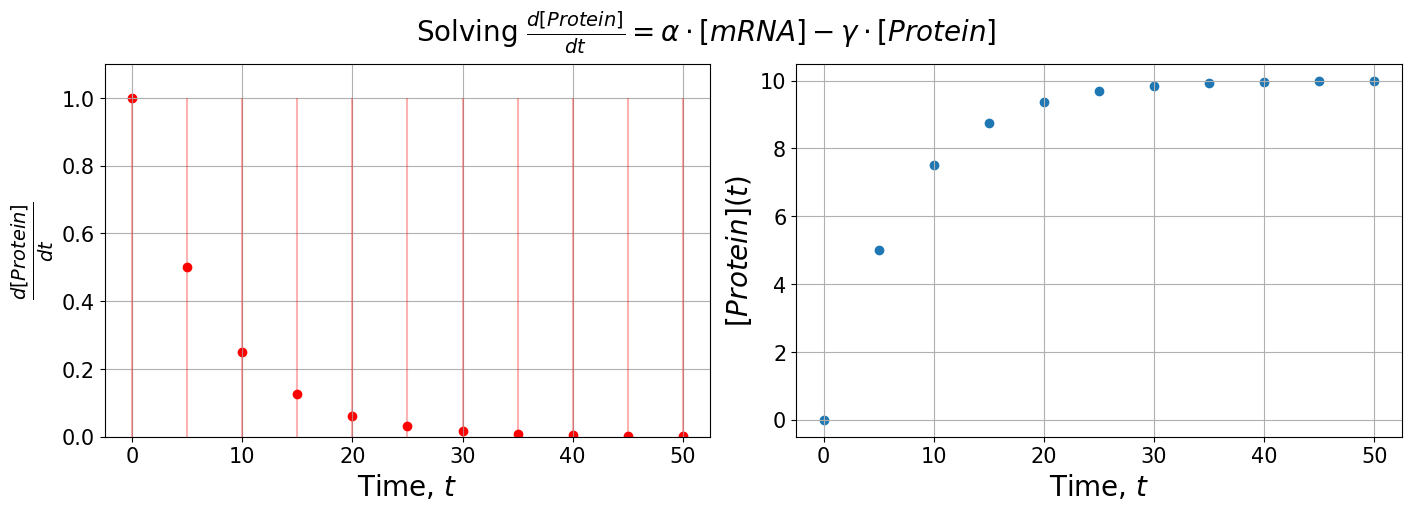

In [2]:
# Model parameters
alpha = 1  # translation rate
gamma = 0.1  # degradation rate
mRNA_conc = 1  # mRNA concentration
InitialProtein = 0  # initial protein concentration

# Segmentation setup
final_timepoint = 50
number_segments = 10
segment_length = final_timepoint / number_segments

# Create plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# Initialize tracking arrays
Calc_Protein = [InitialProtein]
Calc_time = [0]
Calc_rates = [alpha * mRNA_conc - gamma * InitialProtein]

# Calculate each segment
protein, time = InitialProtein, 0
for i in range(1, number_segments + 1):
    # Calculate for this segment
    next_time = i * segment_length
    rate = alpha * mRNA_conc - gamma * protein
    protein = protein + rate * (next_time - time)
    time = next_time
    
    # Store results
    Calc_Protein.append(protein)
    Calc_time.append(time)
    Calc_rates.append(alpha * mRNA_conc - gamma * protein)

# Plot rates and protein concentration
axs[0].scatter(Calc_time, Calc_rates, marker="o", color="red")
axs[0].vlines(np.linspace(0, final_timepoint, number_segments+1), 0, alpha * mRNA_conc, color="red", alpha=0.3)
axs[0].set_ylabel(r"$\frac{d[Protein]}{dt}$", fontsize=20)
axs[0].set_ylim(0, 1.1 * alpha * mRNA_conc)

axs[1].scatter(Calc_time, Calc_Protein, marker="o")
axs[1].set_ylabel("$[Protein](t)$", fontsize=20)

# Style both plots
for ax in axs:
    ax.tick_params(labelsize=15)
    ax.grid(True)
    ax.set_xlabel("Time, $t$", fontsize=20)

# Add title
fig.suptitle(r"Solving $\frac{d[Protein]}{dt} = \alpha \cdot [mRNA] - \gamma \cdot [Protein]$", fontsize=20);

#### What we just did above is really the essence of calculus approach - subdividing a calculation into many segments, assume things are linear in each segment and can be easily calculated and then reassembling the calculation from each segment into the final answer.  
#### Many tricks have been invented over the last several centuries about how to do the trick but the idea is the same.  
Another way to describe what we did above is to say that we solved the following differential equations:  
$\frac{d[Protein](t)}{dt} = \alpha \cdot [mRNA]-\gamma \cdot [Protein]$  with initial condition $[Protein]_0 = 0$  
Yet another way to describe what we did above is to say that we calculated the following integral:  
$[Protein](t)=\int_{0}^{t}(\alpha \cdot [mRNA]-\gamma \cdot [Protein])dt $  
#### Any differential equation or integral can be solved using the computer and the trick above where as a solution you get a list of numbers like we did above. This is called a numerical solution.    
A small fraction of differential equations can be solved exactly (i.e. find $[Protein](t)=f(Protein,t)$) instead of finding a list of numbers like we did in a numerical solution) using trick taught in undergrad differential equations classes. This is called an analytical solution and computers can be used to analytical solution in the cases where they exist. 
#### We will exclusively use computers to solve differential equations during this class and mostly use numerical solutions since most practically interesting problems cannot be solved exactly and using a computer is "easy".

## Numerical solution of $\frac{d[Protein]}{dt}=\alpha \cdot [mRNA]-\gamma \cdot [Protein]$
**We will have a whole lecture about numerical solutions of differential equations.**  
We can solve $\frac{d[Protein](t)}{dt}=\alpha \cdot [mRNA]-\gamma \cdot [Protein]$ numerically (i.e. find numbers that correspond to a solution without finding an exact function) using the SciPy library that allows numerical calculations in Python.

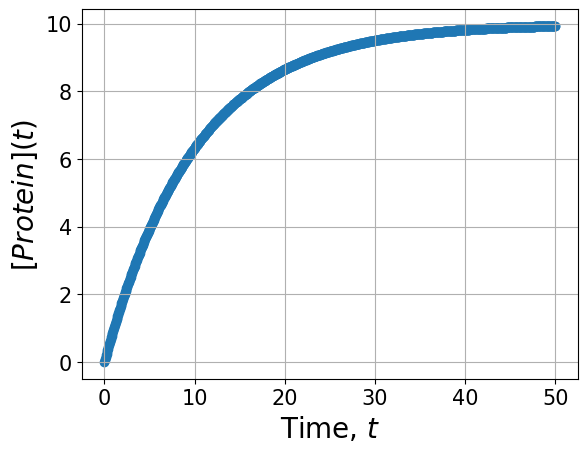

In [3]:
# %%timeit

# "%%timeit" command above is called a "magic command" and
# this command allows you to measure code execution time
# uncomment it to see how fast the differential solution is

alpha = 1
gamma = 0.1
mRNA = 1
final_timepoint = 50
number_of_timepoints = 1000

# Numerically solve diff equations (dPdt = alpha*mRNA - gamma*Protein)
# given Protein0=0 for time points (tspan=[0,final_timepoint]) and save all timepoints in t_eval

# Write down differential equation to be solved
# Change this differential equation to other functions that depend on t to find their solutions
def ODE(t, y):
    Protein = y[0]
    dPdt = alpha*mRNA - gamma*Protein
    return [dPdt]


# Write down initial condition and tspan of time that we want the solution at
Protein0 = [0]
tspan = [0, final_timepoint]
# Actual solution is just this one line of code
soln = solve_ivp(
    ODE, tspan, Protein0, t_eval=np.linspace(0, final_timepoint, number_of_timepoints)
)

# Lets plot the solution
plt.scatter(soln.t, soln.y[0])
plt.ylabel("$[Protein](t)$", fontsize=20)
plt.tick_params(labelsize=15)
plt.grid(which="major", axis="both")
plt.xlabel("Time, $t$", fontsize=20);

*solve_ivp()* has a lot of various options for using specific algorythms, introducing events etc that you can lookup using *solve_ivp?* and that we will review during our numerical calculations lecture

In [6]:
# solve_ivp?

## Analytical solution of $\frac{d[Protein]}{dt}=\alpha \cdot [mRNA]- \gamma \cdot [Protein]$
**We will have a whole lecture about analytical solutions of differential equations.**  
We can solve $\frac{d[Protein]}{dt}=\alpha \cdot [mRNA]- \gamma \cdot [Protein]$  analytically (i.e. find an exact function so that $Protein(t)=f(t)$) using SymPy library that allows symbolic calculations in Python.

In [5]:
# In order to do symbolic calculations we need to tell the computer
# what is a function and what is a variable
Protein = sym.symbols("Protein", cls=sym.Function)  # this defines N as a function
alpha = sym.symbols("alpha")  # this defines alpha as variable
gamma = sym.symbols("gamma")  # this defines gamma as variable
mRNA = sym.symbols("mRNA")  # this defines mRNA as variable
t, Protein0 = sym.symbols("t, Protein0")  # this defines t and N0 as variable

# Write the differential equation that we want to solve
# Change this differential equation to other functions that depend on t to find their solutions
Equation = sym.Eq(sym.diff(Protein(t), t), alpha * mRNA - gamma * Protein(t))
# Solve differential equation
sym.dsolve(Equation, Protein(t), ics={Protein(0): Protein0})

Eq(Protein(t), alpha*mRNA/gamma + (Protein0*gamma - alpha*mRNA)*exp(-gamma*t)/gamma)

*The above three lines of code will solve any differential equation from a Differential Equations textbook (i.e. any differential equation that has an analytical solution) highlighting the power of python and SymPy.*  
  
Try this textbook avalable online if interested: https://archive.org/details/C.HenryEdwardsDavidE.PenneyElementaryDifferentialEquations6thEdition/page/n13/mode/1up